## Importowanie bibliotek i  zbiorów

In [34]:
from sklearn import mixture
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
test = pd.read_csv("./test.csv")
train = pd.read_csv("./train.csv")
val = pd.read_csv("./val.csv")

In [4]:
test.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750
1,0,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278
2,0,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520
3,0,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
4,0,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625


In [36]:
y_test = test.iloc[:, 0]

## Tworzenie modelu

In [27]:
def GMM(X, n_components, covariance_type='full'):
    gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    gmm.fit(X)
    return gmm

#### Chcemy wykorzystać algorytm do wykrywania obserwacji odstających, więc ustalimy podział na jeden klaster, a następnie sprawdzimy z jakim pradopodobieństwem należy on do naszego zbioru. Jeżeli z małym, będzie to dla nas znak, że jest on outlierem

In [28]:
gmm = GMM(X= train, n_components=1)

C:\Users\macch\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


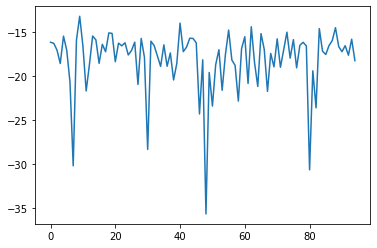

In [42]:
plt.plot(gmm.score_samples(train))

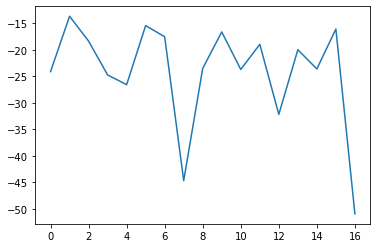

In [43]:
plt.plot(gmm.score_samples(val))

In [94]:
sort = np.sort(gmm.score_samples(train))
threshold = sort[3]
test_prediction1 = np.array(gmm.score_samples(test.drop(columns=["class"], axis=1)) < threshold, dtype = int)

Możemy zauważyć, że w zbiorze testowym cztery spośród naszych obserwacji zdają się odstawać od reszty. Natomiast jeżeli chodzi o zbiór walidacyjny, to tutaj dwie spośród obserwacji zdają się być outlierami. Różnice te są znacze, zatem zastosujmy threshold na poziomie czwartego najmniejszego pradopodobieństwa ze zbioru treningowego, gdyż jest ono najwyższe ze wszystkich "outlierów"

## Ocena modelu

In [95]:
precision_score(y_true=y_test, y_pred=test_prediction1)

0.8333333333333334

In [96]:
recall_score(y_true=y_test, y_pred=test_prediction)

1.0

In [97]:
f1_score(y_true=y_test, y_pred=test_prediction)

0.9090909090909091

## Podsumowanie

Metoda Gaussian Mixture jak najbardziej nadaje się do sprawdzania, czy nasza próbka zawiera outliery.